# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [161]:

import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline
cf.go_offline()

In [41]:
data = pd.read_csv('Provincial_Daily_Totals.csv')

In [42]:
data1 = data.groupby('SummaryDate').sum().filter(['TotalCases','TotalRecovered','TotalTested','TotalActive'])

In [43]:
data1.reset_index(inplace=True)
data1.rename(columns={'SummaryDate':'Date'},inplace=True)
data1

Date  TotalCases  TotalRecovered  TotalTested  \
0    2020/01/25 12:00:00+00           1               0            0   
1    2020/01/26 12:00:00+00           1               0            0   
2    2020/01/27 12:00:00+00           2               0            0   
3    2020/01/28 12:00:00+00           3               0            0   
4    2020/01/29 12:00:00+00           3               0            0   
..                      ...         ...             ...          ...   
109  2020/05/13 12:00:00+00       72278           35177      1224804   
110  2020/05/14 12:00:00+00       73401           36104      1257320   
111  2020/05/15 12:00:00+00       74613           36908      1292166   
112  2020/05/16 12:00:00+00       75864           37832      1325746   
113  2020/05/17 12:00:00+00       77022           38563      1356158   

     TotalActive  
0              1  
1              1  
2              2  
3              3  
4              3  
..           ...  
109        31797  
110        31825  
111        32143  
112        32353  
113        32677  

[114 rows x 5 columns]

In [44]:

data1['Date1'] = pd.to_datetime(data1['Date']).dt.date

In [80]:
data1

Date  TotalCases  TotalRecovered  TotalTested  \
0    2020/01/25 12:00:00+00           1               0            0   
1    2020/01/26 12:00:00+00           1               0            0   
2    2020/01/27 12:00:00+00           2               0            0   
3    2020/01/28 12:00:00+00           3               0            0   
4    2020/01/29 12:00:00+00           3               0            0   
..                      ...         ...             ...          ...   
109  2020/05/13 12:00:00+00       72278           35177      1224804   
110  2020/05/14 12:00:00+00       73401           36104      1257320   
111  2020/05/15 12:00:00+00       74613           36908      1292166   
112  2020/05/16 12:00:00+00       75864           37832      1325746   
113  2020/05/17 12:00:00+00       77022           38563      1356158   

     TotalActive       Date1  
0              1  2020-01-25  
1              1  2020-01-26  
2              2  2020-01-27  
3              3  2020-01-28  
4              3  2020-01-29  
..           ...         ...  
109        31797  2020-05-13  
110        31825  2020-05-14  
111        32143  2020-05-15  
112        32353  2020-05-16  
113        32677  2020-05-17  

[114 rows x 6 columns]

In [49]:
data1.iplot(kind='line', x='Date1',y=['TotalCases','TotalActive','TotalRecovered','TotalTested'])

In [50]:
data2 = pd.read_csv('Compiled_COVID-19_Case_Details__Canada_.csv')

In [106]:
data2Male = data2[data2['gender']=='Male']
data2Male['MaleCaseNumber'] = 1
data2Male.head()
Maleaffected = data2Male.groupby('date_reporte').sum()
Maleaffected = Maleaffected.filter(['MaleCaseNumber'])
Maleaffected.head()

MaleCaseNumber
date_reporte                
2020-01-01                 1
2020-01-15                 1
2020-01-19                 1
2020-01-21                 1
2020-01-26                 1

In [107]:
data2Female = data2[data2['gender']=='Female']
data2Female['FemaleCaseNumber'] = 1
data2Female.head()

FID  row_id date_reporte  gender       exposure case_status   latitude  \
0    1    2000   2020-05-05  Female  Close Contact      Active  43.045446   
1    2       0   2020-04-13  Female  Close Contact   Recovered  42.995716   
3    4    2001   2020-03-14  Female      Community   Recovered  42.995716   
4    5    1501   2020-05-12  Female        Pending      Active  43.253243   
5    6       1   2020-03-28  Female  Close Contact   Recovered  42.995716   

   longitude province province_abbr  hr_uid  FemaleCaseNumber  
0 -79.313670  Ontario            ON  3546.0                 1  
1 -81.456983  Ontario            ON  3544.0                 1  
3 -81.456983  Ontario            ON  3544.0                 1  
4 -79.958463  Ontario            ON  3537.0                 1  
5 -81.456983  Ontario            ON  3544.0                 1

In [108]:
Femaleaffected = data2Female.groupby('date_reporte').sum()
Femaleaffected = Femaleaffected.filter(['FemaleCaseNumber'])
Femaleaffected.head()

FemaleCaseNumber
date_reporte                  
2020-01-10                   1
2020-01-22                   1
2020-01-24                   1
2020-02-01                   3
2020-02-02                   1

In [109]:
MFD = pd.merge(Femaleaffected,Maleaffected, how = 'outer', left_index= True,right_index=True)


In [128]:
MFD = MFD.fillna(value=0)
MFD['TotalMaleCases']= MFD['MaleCaseNumber'].cumsum()
MFD['TotalFemaleCases']= MFD['FemaleCaseNumber'].cumsum()

MFD.rename(columns = {'date_reporte':'Date1'},inplace=True)


level_0  index       Date1  FemaleCaseNumber  MaleCaseNumber  \
0          0      0  2020-01-01               0.0             1.0   
1          1      1  2020-01-10               1.0             0.0   
2          2      2  2020-01-15               0.0             1.0   
3          3      3  2020-01-19               0.0             1.0   
4          4      4  2020-01-21               0.0             1.0   
..       ...    ...         ...               ...             ...   
102      102    102  2020-05-13             107.0           113.0   
103      103    103  2020-05-14              85.0            93.0   
104      104    104  2020-05-15              57.0            55.0   
105      105    105  2020-05-16              37.0            39.0   
106      106    106  2020-05-17              16.0            20.0   

     TotalMaleCases  TotalFemaleCases  
0               1.0               0.0  
1               1.0               1.0  
2               2.0               1.0  
3               3.0               1.0  
4               4.0               1.0  
..              ...               ...  
102         14011.0           17215.0  
103         14104.0           17300.0  
104         14159.0           17357.0  
105         14198.0           17394.0  
106         14218.0           17410.0  

[107 rows x 7 columns]

In [135]:
MFD['Date1'] = MFD['Date1'].astype('datetime64[ns]')
MFD.set_index('Date1', inplace=True)

In [89]:
data1foranalysis = data1.set_index('Date1')



In [134]:

data1foranalysis['Date1'] = data1foranalysis['Date1'].astype('datetime64[ns]')
data1foranalysis.set_index('Date1', inplace=True)

In [138]:
FinalData = pd.merge(data1foranalysis,MFD,how = 'outer',left_index=True , right_index=True)
FinalData1= FinalData.reset_index()
FinalData1.head()

Date1  level_0_x  index_x  TotalCases  TotalRecovered  TotalTested  \
0 2020-01-01        NaN      NaN         NaN             NaN          NaN   
1 2020-01-10        NaN      NaN         NaN             NaN          NaN   
2 2020-01-15        NaN      NaN         NaN             NaN          NaN   
3 2020-01-19        NaN      NaN         NaN             NaN          NaN   
4 2020-01-21        NaN      NaN         NaN             NaN          NaN   

   TotalActive  level_0_y  index_y  FemaleCaseNumber  MaleCaseNumber  \
0          NaN        0.0      0.0               0.0             1.0   
1          NaN        1.0      1.0               1.0             0.0   
2          NaN        2.0      2.0               0.0             1.0   
3          NaN        3.0      3.0               0.0             1.0   
4          NaN        4.0      4.0               0.0             1.0   

   TotalMaleCases  TotalFemaleCases  
0             1.0               0.0  
1             1.0               1.0  
2             2.0               1.0  
3             3.0               1.0  
4             4.0               1.0

In [141]:
ConsolidateDataset = FinalData1.filter(['Date1','TotalCases','TotalRecovered',
                                        'TotalActive','TotalMaleCases','TotalFemaleCases'])
ConsolidateDataset

Date1  TotalCases  TotalRecovered  TotalActive  TotalMaleCases  \
0   2020-01-01         NaN             NaN          NaN             1.0   
1   2020-01-10         NaN             NaN          NaN             1.0   
2   2020-01-15         NaN             NaN          NaN             2.0   
3   2020-01-19         NaN             NaN          NaN             3.0   
4   2020-01-21         NaN             NaN          NaN             4.0   
..         ...         ...             ...          ...             ...   
116 2020-05-13     72278.0         35177.0      31797.0         14011.0   
117 2020-05-14     73401.0         36104.0      31825.0         14104.0   
118 2020-05-15     74613.0         36908.0      32143.0         14159.0   
119 2020-05-16     75864.0         37832.0      32353.0         14198.0   
120 2020-05-17     77022.0         38563.0      32677.0         14218.0   

     TotalFemaleCases  
0                 0.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0  
..                ...  
116           17215.0  
117           17300.0  
118           17357.0  
119           17394.0  
120           17410.0  

[121 rows x 6 columns]

In [195]:
fig =ConsolidateDataset.iplot(kind='bar', x='Date1',y=['TotalCases',
                                      'TotalRecovered','TotalActive','TotalMaleCases','TotalFemaleCases'],title='Covid-19 Analysis of Canada')



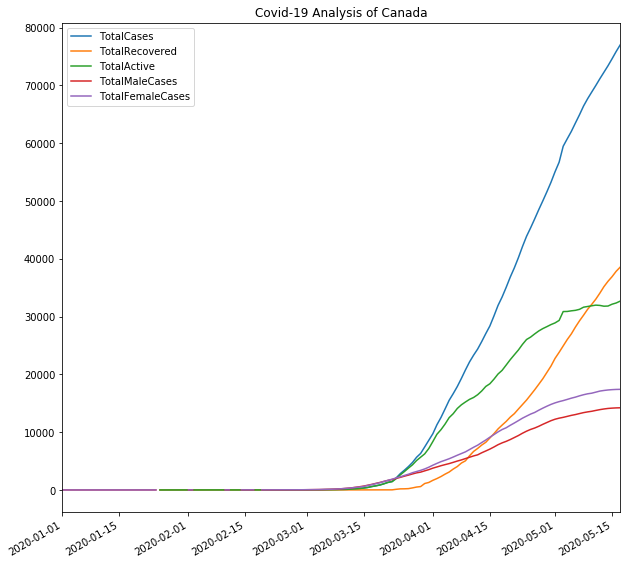

In [214]:

fig = ConsolidateDataset.plot(kind='line', x='Date1',y=['TotalCases',
                                      'TotalRecovered','TotalActive'
                                                        ,'TotalMaleCases','TotalFemaleCases']
                              ,title='Covid-19 Analysis of Canada')

fig.set_xlabel('')
plt.rcParams["figure.figsize"] = [15,10]